# Facebook EDA
This is a shorter project to practice some graphing and data cleaning as a review expierence. The data set is from Kaggle and contains information about various facebook posts that were manually rated for their factaul content. Each post is a row and the columns contain different information about how the posts were interacted with. I do not plan on building a model or anything. 

### Imports

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Reading the Dataset

In [91]:
df = pd.read_csv("data/facebook-fact-check.csv")

In [92]:
df.head()

,account_id,post_id,Category,Page,Post URL,Date Published,Post Type,Rating,Debate,share_count,reaction_count,comment_count
0,184096565021911,1035057923259100,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,no factual content,NaN,NaN,146.0,15.0
1,184096565021911,1035269309904628,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,1.0,33.0,34.0
2,184096565021911,1035305953234297,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,34.0,63.0,27.0
3,184096565021911,1035322636565962,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,link,mostly true,NaN,35.0,170.0,86.0
4,184096565021911,1035352946562931,mainstream,ABC News Politics,https://www.facebook.com/ABCNewsPolitics/posts...,2016-09-19,video,mostly true,NaN,568.0,3188.0,2815.0


### Basic Cleaning

In [93]:
df.columns = [col.lower() for col in df.columns]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 12 columns):
account_id        2282 non-null int64
post_id           2282 non-null int64
category          2282 non-null object
page              2282 non-null object
post url          2282 non-null object
date published    2282 non-null object
post type         2282 non-null object
rating            2282 non-null object
debate            298 non-null object
share_count       2212 non-null float64
reaction_count    2280 non-null float64
comment_count     2280 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 214.0+ KB


In [95]:
plt.style.use(['fivethirtyeight']) #making my graphs look purd..ier
plt.style.use(['seaborn-poster'])

In [96]:
df.rating.value_counts()

mostly true                  1669
no factual content            264
mixture of true and false     245
mostly false                  104
Name: rating, dtype: int64

Posts that contain no factual content have the highest average share count. They are also the most volatile as they have the biggest variance in outcomes.

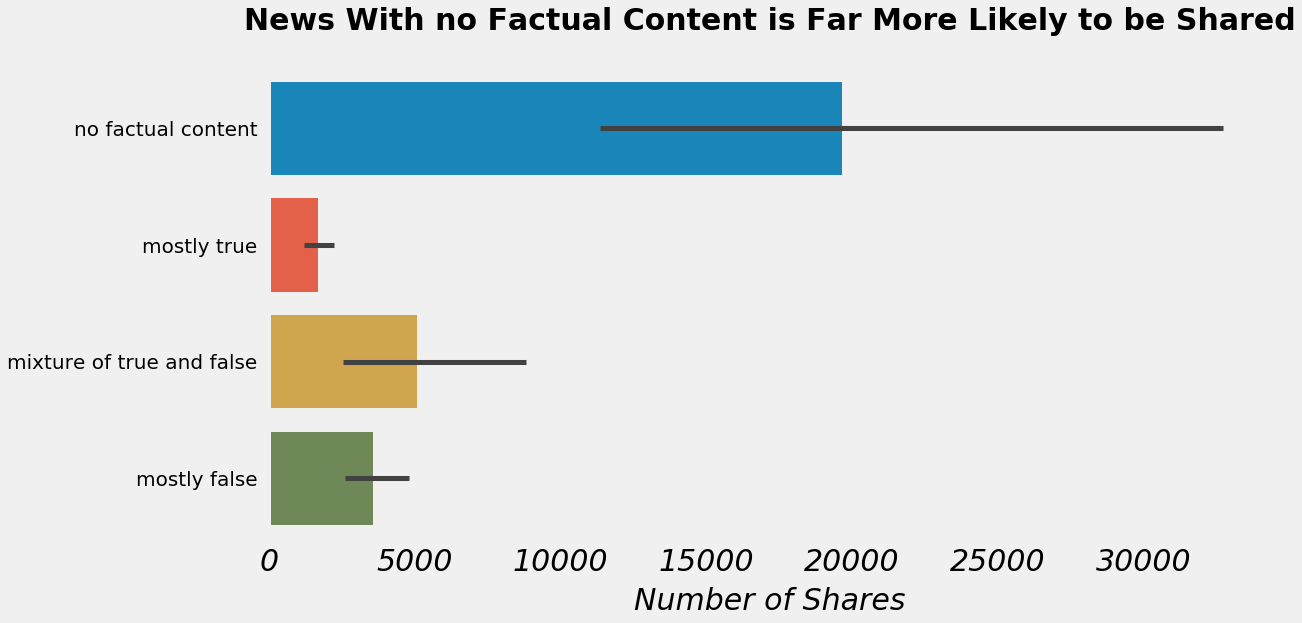

In [97]:
plt.figure(figsize = (16, 8))
sns.barplot("share_count", "rating", data =df)
plt.title('News With no Factual Content is Far More Likely to be Shared', 
          fontweight ='bold', size = 30, pad = 40, loc = 'center')# title
plt.xlabel("Number of Shares", size = 30, labelpad = 10, style = 'italic')
plt.xticks(style = 'italic', size = 30)
plt.ylabel(None)
plt.yticks(size = 20)
plt.grid(axis = 'x')
plt.savefig('images/sharesvsrating', bbox_inches='tight', transperent = True)

Lets do some date time work, first I will just set the values equal to a Pandas' datetime variable to increase their functionality. 

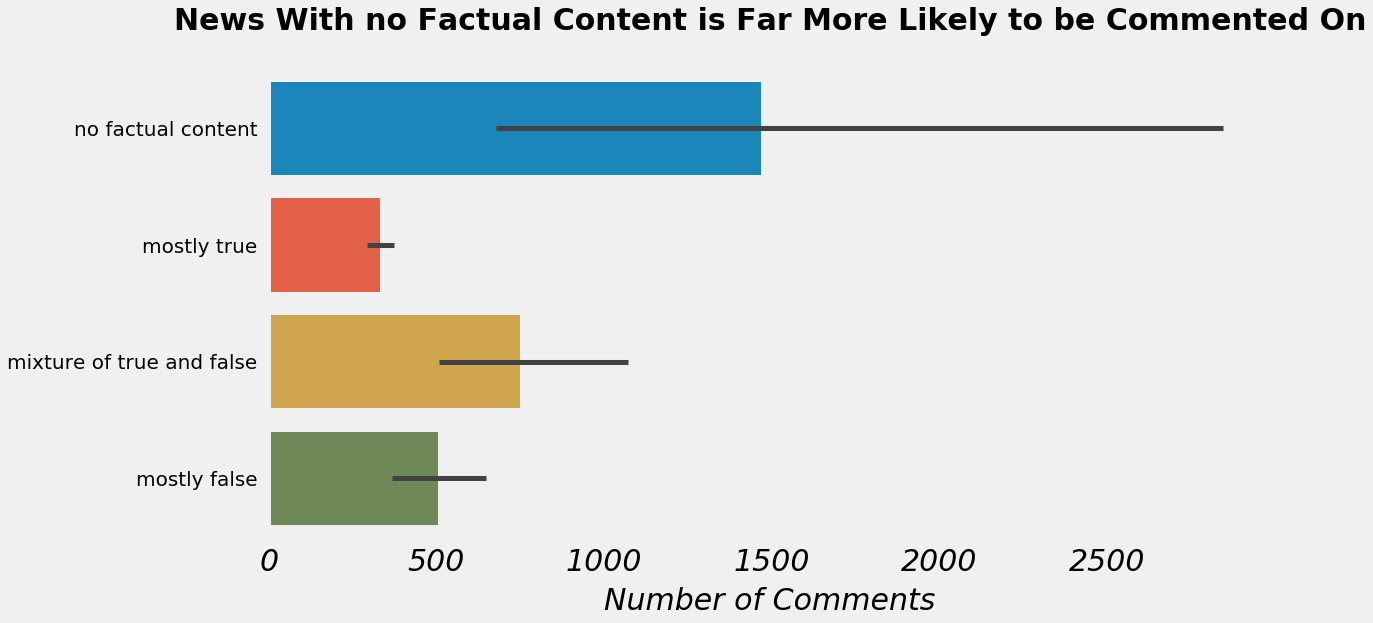

In [98]:
plt.figure(figsize = (16, 8))
sns.barplot("comment_count", "rating", data =df)
plt.title('News With no Factual Content is Far More Likely to be Commented On', 
          fontweight ='bold', size = 30, pad = 40, loc = 'center')# title
plt.xlabel("Number of Comments", size = 30, labelpad = 10, style = 'italic')
plt.xticks(style = 'italic', size = 30)
plt.ylabel(None)
plt.yticks(size = 20)
plt.grid(axis = 'x')
plt.savefig('images/commentssvsrating', bbox_inches='tight', transperent = True)

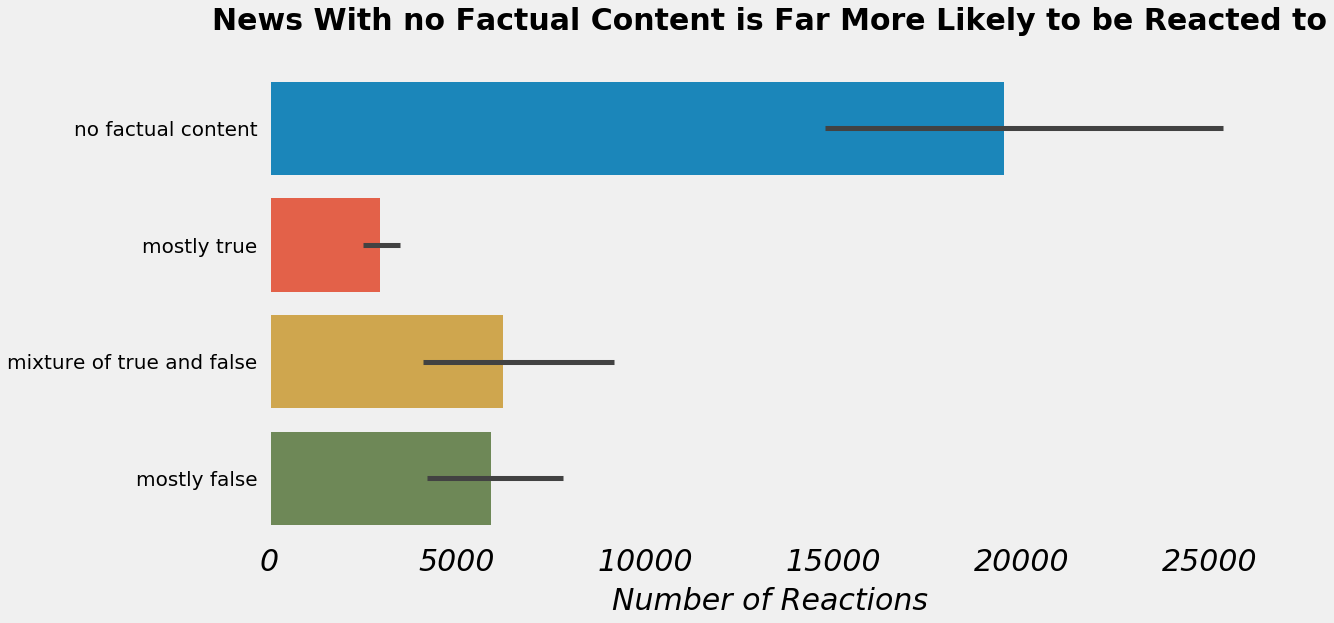

In [99]:
plt.figure(figsize = (16, 8))
sns.barplot("reaction_count", "rating", data =df)
plt.title('News With no Factual Content is Far More Likely to be Reacted to', 
          fontweight ='bold', size = 30, pad = 40, loc = 'center')# title
plt.xlabel("Number of Reactions", size = 30, labelpad = 10, style = 'italic')
plt.xticks(style = 'italic', size = 30)
plt.ylabel(None)
plt.yticks(size = 20)
plt.grid(axis = 'x')
plt.savefig('images/commentssvsrating', bbox_inches='tight', transperent = True)

Manufactured news was also most likely to be commented on and reacted too.

In [100]:
df.date = pd.to_datetime(df["date published"], format='%Y-%M-%d')

/Users/aidancoco/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [101]:
#how long was this data collected for?
df.date.min() - df.date.max()

Timedelta('-8 days +00:00:00')

This data set is only over 8 days unfortunately 

In [102]:
df.date.max()

Timestamp('2016-01-27 00:09:00')

In [ ]:
titles = df.page.value_counts().index
values = df.page.value_counts().values
plt.figure(figsize = (22, 8))
plt.bar(titles, values)

<BarContainer object of 9 artists>